La información es obtenida de dos fuentes:

- Instituto Nacional de Estadística y Geografía (INEGI) en:

https://www.inegi.org.mx/programas/accidentes/#datos_abiertos

- Instituto Internacional de Ciencia de Datos, respecto a la información recopilada por la aseguradora AXA:

https://i2ds.org/datos-abiertos/



Accidentes de Tránsito Terrestre en Zonas Urbanas y Suburbanas (ATUS)

La recolección de datos para la elaboración de la estadística de accidentes de tránsito terrestre en zonas urbanas y suburbanas inició en el año 1928, y los procedimientos para su obtención se han modificado paulatinamente.

Esta estadística mide la siniestralidad del transporte a nivel nacional, y se genera a partir del acopio y procesamiento de los datos alusivos a los accidentes ocurren en zonas no federales. Esta información contribuyó a la planeación, organización del transporte y la prevención de accidentes.

Obtener:

- Accidentes viales por década
- Fallecimientos por accidentes viales por década
- Semana del año donde ocurren más accidentes de acuerdo con la serie de tiempo
- Estadística de más accidentes por día de la semana, hora del día, fin de semana, y/o día festivo.
- Promedio de accidentes y su posible predicción por Poisson.
- Tipo de accidente en cada semana (atropellamiento, volcamiento, choque contra objetos, etc.)
- Principales causas de accidentes: [ProyectoPuente - Causas](https://www.uniradioinforma.com/policiaca/hermosillo-reporta-ligera-disminucion-accidentes-viales-n822053)

In [1]:
import numpy as np
import pandas as pd
import requests
import zipfile as zf
import os, io

In [2]:
# URL de descarga
url_inegi = 'https://www.inegi.org.mx/contenidos/programas/accidentes/datosabiertos/conjunto_de_datos_atus_anual_csv.zip' # INEGI
url_axa = 'https://files.i2ds.org/OpenDataAxaMx/incidentes_viales_2023_axa.zip' # AXA

# Descarga de Datos

## Datos de AXA

In [3]:
datos_axa = './data/raw/AXA/'
if not os.path.exists(datos_axa):
    os.makedirs(datos_axa)

In [4]:
response = requests.get(url_axa)

In [5]:
with zf.ZipFile(io.BytesIO(response.content), 'r') as zip_object:
    zip_object.extractall(datos_axa)

In [10]:
month_mapping = {
    "Enero": 1,
    "Febrero": 2,
    "Marzo": 3,
    "Abril": 4,
    "Mayo": 5,
    "Junio": 6,
    "Julio": 7,
    "Agosto": 8,
    "Septiembre": 9,
    "Octubre": 10,
    "Noviembre": 11,
    "Diciembre": 12
}

In [29]:
dfs = {}  # Dictionary to store dataframes, using month number as key
header = None

# Extract the column names first for those files starting with "df"
for file in os.listdir(datos_axa):
  if file.startswith('df_'):
    header = pd.read_csv(os.path.join(datos_axa, file), nrows=1).columns

for file in os.listdir(datos_axa):
    if file.endswith('.csv'):
        filepath = os.path.join(datos_axa, file)
        parts = file.split('_')
        if file.startswith('df_'):
            month_name = parts[4]
        else:
            month_name = parts[3]
        # Get the month number from the mapping
        month_number = month_mapping.get(month_name)

        if month_number is not None:
            try:
                if file.startswith('df_'):
                    df = pd.read_csv(filepath)
                    print(f"Created DataFrame for {file} with shape {df.shape} and stored with key {month_number}")
                    dfs[month_number] = df
                else:
                    df = pd.read_csv(filepath)
                    df.columns = header
                    print(f"Created DataFrame for {file} with shape {df.shape} and stored with key {month_number}")
                    dfs[month_number] = df
            except Exception as e:
                print(f"Error reading file {file}: {e}")
        else:
            print(f"Could not find a number for the month: {month_name} in file {file}")

Created DataFrame for Seguridad_Vial_concatenado_Abril_2023.csv with shape (23831, 44) and stored with key 4
Created DataFrame for Seguirad_vial_concatenado_Mayo_2023.csv with shape (28116, 44) and stored with key 5
Created DataFrame for Seguridad_Vial_concatenado_Marzo_2023.csv with shape (27418, 44) and stored with key 3
Created DataFrame for Seguridad_Vial_concatenado_Febrero_2023.csv with shape (23040, 44) and stored with key 2
Created DataFrame for df_Seguridad_Vial_concatenado_Julio_2023.csv with shape (28042, 44) and stored with key 7
Created DataFrame for df_Seguridad_Vial_concatenado_Septiembre_2023.csv with shape (29874, 44) and stored with key 9
Created DataFrame for df_Seguridad_Vial_concatenado_Noviembre_2023.csv with shape (3027, 44) and stored with key 11
Created DataFrame for df_Seguridad_Vial_concatenado_Agosto_2023.csv with shape (30389, 44) and stored with key 8
Created DataFrame for df_Seguridad_Vial_concatenado_Diciembre_2023.csv with shape (29531, 44) and stored w

In [28]:
dfs[4]

,1729926.0,16.8640046,-99.8826865,39630.0,Avenida Cuauhtémoc 231,Las Anclas,nan,Auto,PLATA,2018.0,...,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43
0,1730618.0,16.795457,-99.809145,39890.0,C. Simon Bolivar 52,Granjas del Marqués,NaN,Auto,PLATA,2015.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1731051.0,17.539617,-99.501461,39074.0,Avenida Vicente Guerrero 2461,Zona Sin Asignación de Nombre de Colonia 20,NaN,Auto,BLANCO,2022.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1731575.0,16.858108,-99.914986,39580.0,Calzada Pie de la Cuesta 118(2,Hogar Moderno,NaN,Auto,PLATA,2020.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1732011.0,16.789913,-99.800291,39890.0,Boulevard de las Naciones 49,Granjas del Marqués,NaN,Auto,BLANCO,2020.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1732170.0,16.818710,-99.805274,39906.0,Nicolás Bravo numero 28,Llano Largo,NaN,Auto,PLATA,2018.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23826,1810391.0,19.478994,-96.857454,91642.0,\N,\N,NaN,Auto,AZUL,2019.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23827,1811883.0,19.512802,-96.877216,91193.0,Carretera Federal 140 140,Pastoresa,NaN,Auto,BLANCO,2021.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23828,1812834.0,19.350726,-97.031785,91256.0,\N,\N,NaN,Auto,BLANCO,2019.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23829,1812834.0,19.350726,-97.031785,91256.0,\N,\N,NaN,Auto,BLANCO,2019.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
dfs = {}

for file in os.listdir(datos_axa):
    if file.endswith('.csv'):
        parts = file.split('_')
        if file.startswith("df_"):
            month_name = parts[4]
        else:
            month_name = parts[3]

        month_number = month_mapping.get(month_name)

        if month_number is not None:
            # Create the full filepath
            filepath = os.path.join(datos_axa, file)

            # Create a DataFrame from the file
            try:
                df = pd.read_csv(filepath)
                dfs[month_number] = df  # Store the dataframe with month number as key
                print(f"Created DataFrame for {file} with shape {df.shape} and stored with key {month_number}")
            except Exception as e:
                print(f"Error reading file {file}: {e}")

        else:
            print(f"Could not find a number for the month: {month_name} in file {file}")

Created DataFrame for Seguridad_Vial_concatenado_Abril_2023.csv with shape (23831, 44) and stored with key 4
Created DataFrame for Seguirad_vial_concatenado_Mayo_2023.csv with shape (28116, 44) and stored with key 5
Created DataFrame for Seguridad_Vial_concatenado_Marzo_2023.csv with shape (27418, 44) and stored with key 3
Created DataFrame for Seguridad_Vial_concatenado_Febrero_2023.csv with shape (23040, 44) and stored with key 2
Created DataFrame for df_Seguridad_Vial_concatenado_Julio_2023.csv with shape (28042, 44) and stored with key 7
Created DataFrame for df_Seguridad_Vial_concatenado_Septiembre_2023.csv with shape (29874, 44) and stored with key 9
Created DataFrame for df_Seguridad_Vial_concatenado_Noviembre_2023.csv with shape (3027, 44) and stored with key 11
Created DataFrame for df_Seguridad_Vial_concatenado_Agosto_2023.csv with shape (30389, 44) and stored with key 8
Created DataFrame for df_Seguridad_Vial_concatenado_Diciembre_2023.csv with shape (29531, 44) and stored w

In [ ]:
concatenated_df = pd.concat(dfs.values(), ignore_index=True)
print("Shape of the concatenated DataFrame:", concatenated_df.shape)
display(concatenated_df.head())

In [ ]:
import shutil

folder_path = './data/raw/AXA/'
if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print(f"Folder '{folder_path}' and its contents deleted successfully.")
else:
    print(f"Folder '{folder_path}' does not exist.")

Folder './data/raw/AXA/' does not exist.


DATOS DE INEGI 2024

In [ ]:
response = requests.get(url_inegi)
print(type(response))

<class 'requests.models.Response'>


In [ ]:
datos_inegi = './data/raw/ATUS/'
if not os.path.exists(datos_inegi):
    os.makedirs(datos_inegi)

with zf.ZipFile(io.BytesIO(response.content), 'r') as zip_object:
    # Extrae todos los archivos del ZIP a la carpeta de destino
    zip_object.extractall(datos_inegi)

Con el método BytesIO del módulo io, se trata la respuesta del HTTP (una secuencia de bytes) como un archivo en memoria. Esto permite a zipfile.Zipfile leer el contenido directo desde memoria.

In [ ]:
df = pd.read_csv(datos + 'conjunto_de_datos/atus_anual_2024.csv')
display(df.head())

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,...,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS
0,Municipal,1,1,2023,1,0,0,1,Domingo,Sin accidente en esta zona,...,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
1,Municipal,1,1,2023,1,0,0,1,Domingo,Accidente en intersección,...,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
2,Municipal,1,1,2023,1,2,20,1,Domingo,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
3,Municipal,1,1,2023,1,3,20,1,Domingo,Accidente en intersección,...,0,0,0,0,0,0,0,0,Fatal,Cifras Definitivas
4,Municipal,1,1,2023,1,6,0,1,Domingo,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas


In [ ]:
df.shape

(396628, 45)

En Sonora se está proponiendo imponer un límite de edad para conducir un automóvil, el cual ronda en los 70 años.

¿Qué edades suelen tener accidentes? ¿Debería haber un límite real en la edad para permitir la conducción de un automóvil?

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.columns

Index(['COBERTURA', 'ID_ENTIDAD', 'ID_MUNICIPIO', 'ANIO', 'MES', 'ID_HORA',
       'ID_MINUTO', 'ID_DIA', 'DIASEMANA', 'URBANA', 'SUBURBANA', 'TIPACCID',
       'AUTOMOVIL', 'CAMPASAJ', 'MICROBUS', 'PASCAMION', 'OMNIBUS', 'TRANVIA',
       'CAMIONETA', 'CAMION', 'TRACTOR', 'FERROCARRI', 'MOTOCICLET',
       'BICICLETA', 'OTROVEHIC', 'CAUSAACCI', 'CAPAROD', 'SEXO', 'ALIENTO',
       'CINTURON', 'ID_EDAD', 'CONDMUERTO', 'CONDHERIDO', 'PASAMUERTO',
       'PASAHERIDO', 'PEATMUERTO', 'PEATHERIDO', 'CICLMUERTO', 'CICLHERIDO',
       'OTROMUERTO', 'OTROHERIDO', 'NEMUERTO', 'NEHERIDO', 'CLASACC',
       'ESTATUS'],
      dtype='object')

In [ ]:
df['generacion'] = np.floor(df['ID_EDAD'] / 10) * 10

El rango de 99 es únicamente para aquellos casos que no están identificada su edad, por lo que se usa este código.

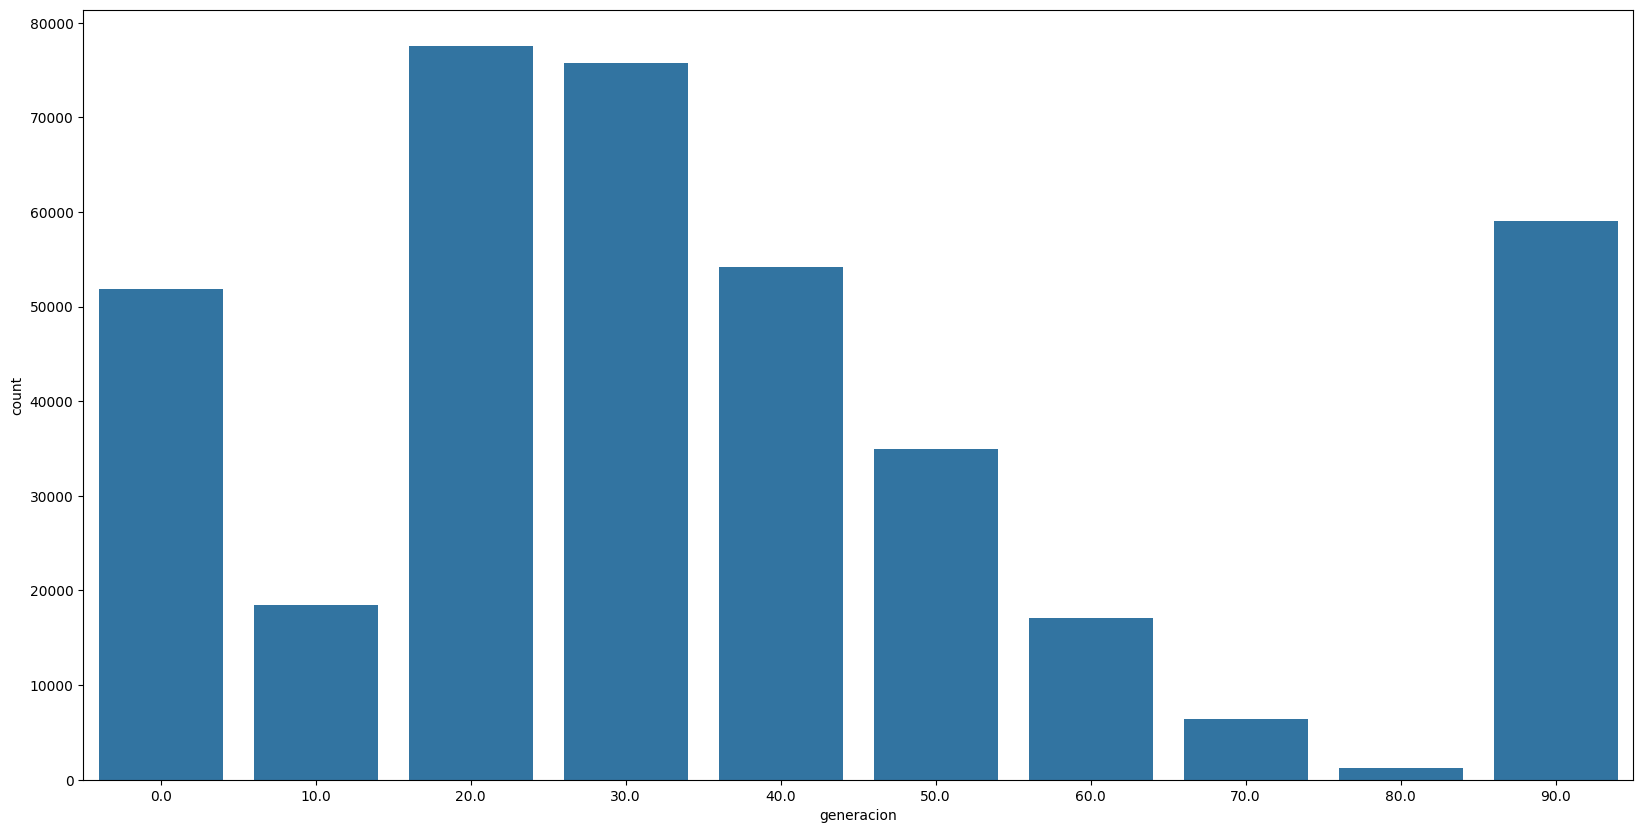

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x='generacion', data=df)
plt.show()